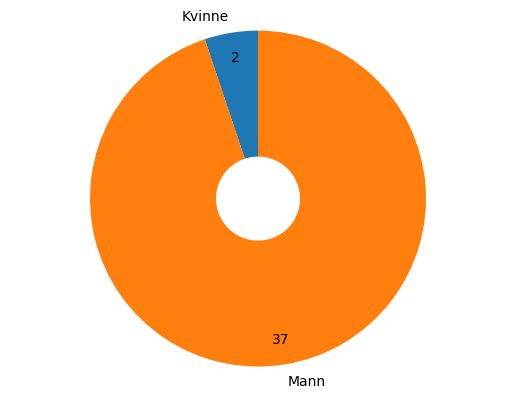

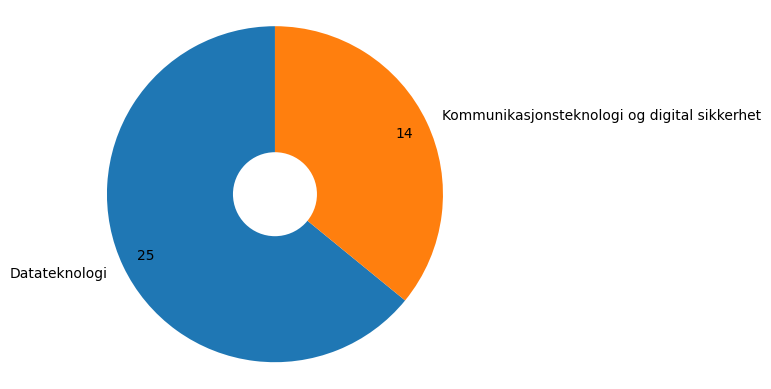

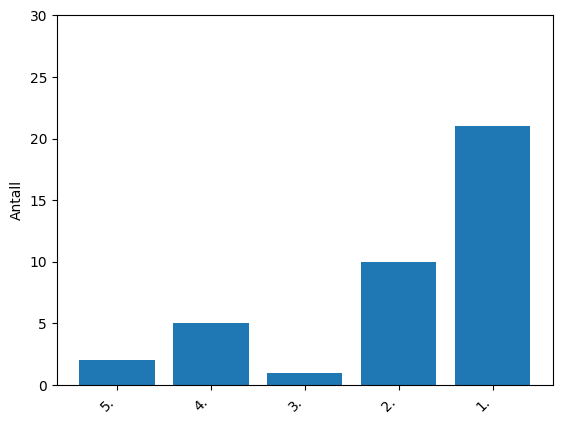

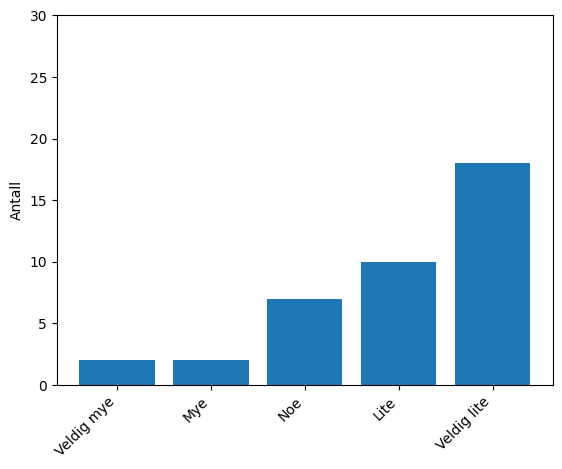

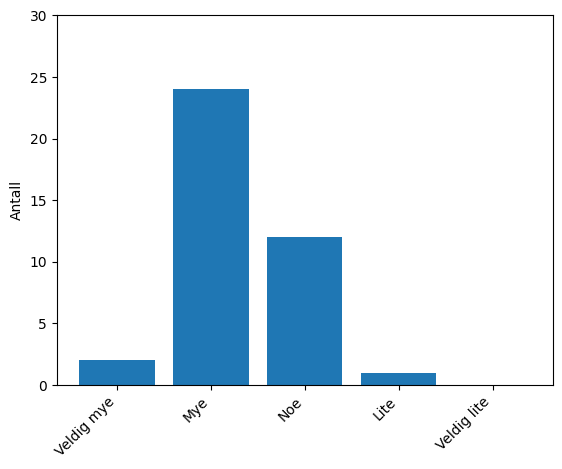

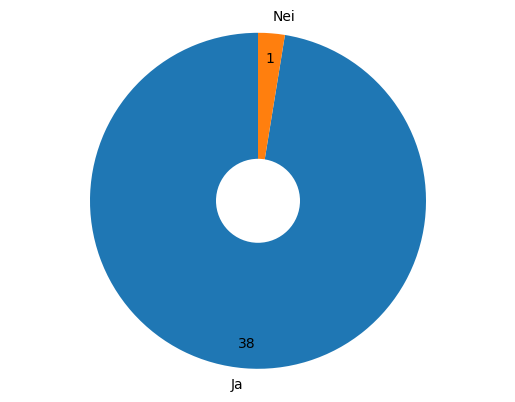

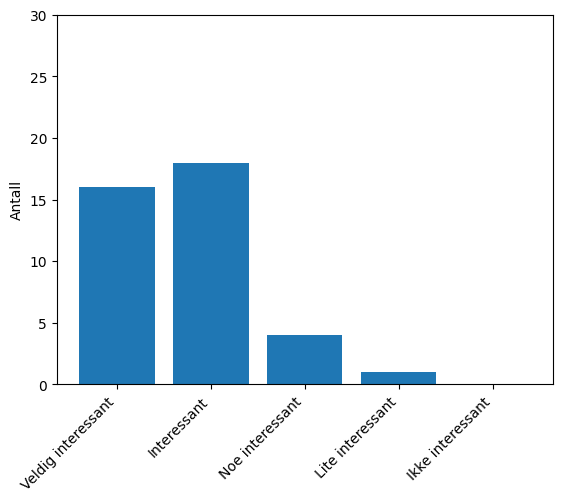

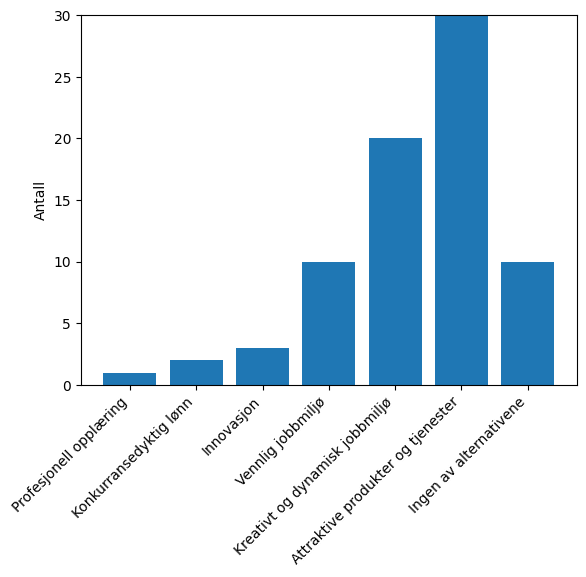

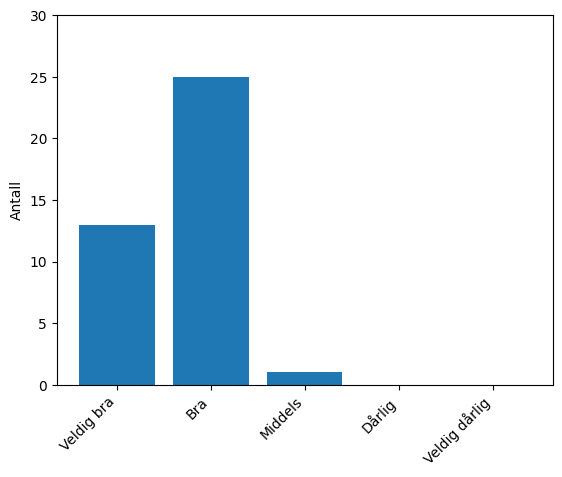

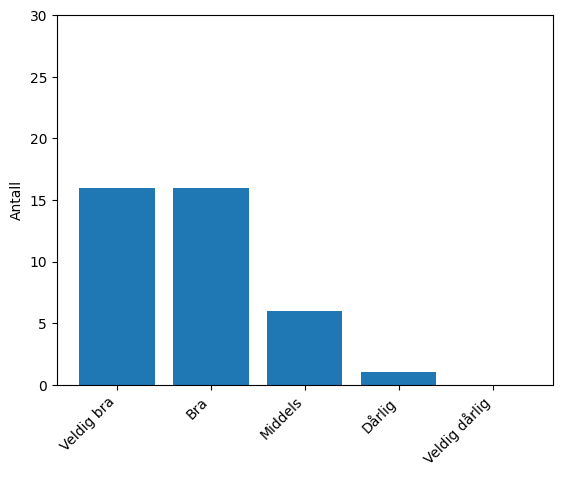

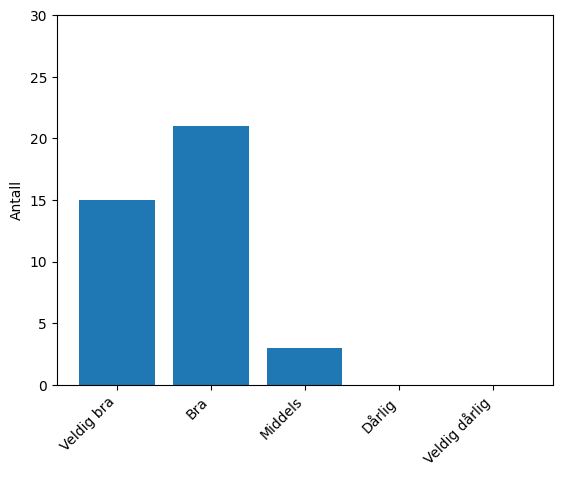

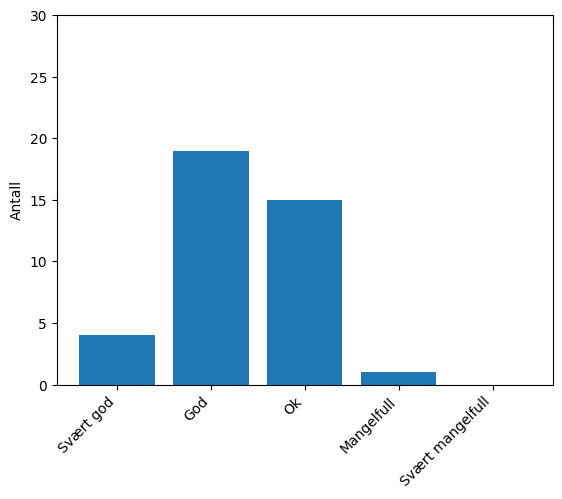

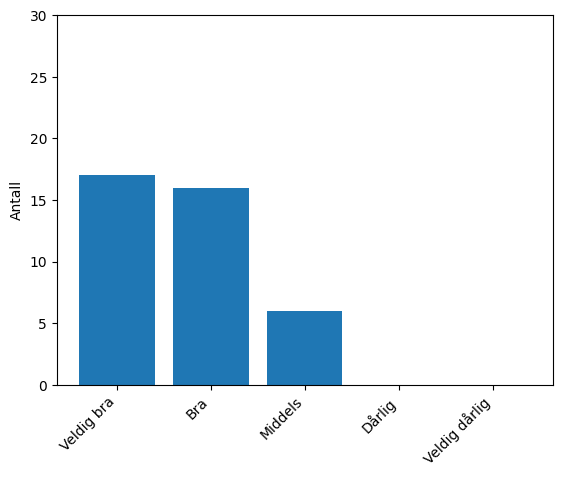

In [35]:
import matplotlib.pyplot as plt

data = [
[#kvinner/menn
    ('Kvinne', 2), 
    ('Mann', 37)], 
[#retning
    ('Datateknologi', 25), 
    ('Kommunikasjonsteknologi og digital sikkerhet', 14)],
[#kunne tenke seg å jobbe der
    ('Ja', 38), 
    ('Nei', 1)],
[#klassetrinn
    ('5.', 2), 
    ('4.', 5), 
    ('3.', 1), 
    ('2.', 10), 
    ('1.', 21)],
[#fremforing_presentasjon
    ('Veldig bra', 16),
    ('Bra', 16),
    ('Middels', 6),
    ('Dårlig', 1),
    ('Veldig dårlig', 0)],
 [#innhold_presentasjon
    ('Veldig bra', 15),
    ('Bra', 21),
    ('Middels', 3),
    ('Dårlig', 0),
    ('Veldig dårlig', 0)],
 [#kunnskap_bedrift_pre
    ('Veldig mye', 2),
    ('Mye', 2),
    ('Noe', 7),
    ('Lite', 10),
    ('Veldig lite', 18)],
 [#kunnskap_bedrift_post
    ('Veldig mye', 2),
    ('Mye', 24),
    ('Noe', 12),
    ('Lite', 1),
    ('Veldig lite', 0)],
 [#info_jobb
    ('Svært god', 4),
    ('God', 19),
    ('Ok', 15),
    ('Mangelfull', 1),
    ('Svært mangelfull', 0)],
 [#mingling
    ('Veldig bra', 17),
    ('Bra', 16),
    ('Middels', 6),
    ('Dårlig', 0),
    ('Veldig dårlig', 0)],
 [#intterresant_arbeid
    ('Veldig interessant', 16),
    ('Interessant', 18),
    ('Noe interessant', 4),
    ('Lite interessant', 1),
    ('Ikke interessant', 0)],
 [#sosialt_miljø
    ('Veldig bra', 18),
    ('Bra', 18),
    ('Middels', 3),
    ('Dårlig', 0),
    ('Veldig dårlig', 0)],
 [#arbeidsvilkår
    ('Veldig bra', 13),
    ('Bra', 25),
    ('Middels', 1),
    ('Dårlig', 0),
    ('Veldig dårlig', 0)],
 [#helhetsvurdering_bedrift
    ('Veldig interessant', 25),
    ('Ok', 5),
    ('Lite interessant', 1),
    ('Ikke interessant', 0),
    ('Interessant', 8)],
 [#inntrykk_arrangement
    ('5 - veldig bra', 10),
    ('4', 9),
    ('3', 6),
    ('2', 3),
    ('1 - veldig dårlig', 2)],
[#hva bedriften tilbyr
    ('Profesjonell opplæring', 1),
    ('Konkurransedyktig lønn', 2),
    ('Innovasjon', 3),
    ('Vennlig jobbmiljø', 10),
    ('Kreativt og dynamisk jobbmiljø', 20),
    ('Attraktive produkter og tjenester', 40),
    ('Ingen av alternativene', 10)]
  ]

def draw_bar(data):
   labels = [x[0] for x in data]
   values = [x[1] for x in data]
   fig, ax = plt.subplots()
   ax.bar(labels, values)
   ax.set_ylim([0, 30])
   ax.set_ylabel('Antall')
   plt.xticks(rotation=45, ha='right')  # Rotate labels
   plt.show()

def draw_pie(data):
   labels = [x[0] for x in data]
   sizes = [x[1] for x in data]
   fig, ax = plt.subplots()
   ax.pie(sizes, labels=labels, autopct=lambda p: '{:.0f}'.format(p * sum(sizes) / 100), startangle=90, pctdistance=0.85)
   centre_circle = plt.Circle((0,0),0.25,fc='white') # Draw a circle at the center
   fig.gca().add_artist(centre_circle)
   ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
   plt.show()

def main():
   lunsjpres = False
   draw_pie(data[0])    #kvinner/menn
   draw_pie(data[1])    #retning
   draw_bar(data[3])    #klassetrinn
   draw_bar(data[6])    #kunnskap_bedrift_pre
   draw_bar(data[7])    #kunnskap_bedrift_post
   draw_pie(data[2])    #kunne tenke seg å jobbe der
   draw_bar(data[-6])   #intterresant_arbeid
   draw_bar(data[-1])   #hva bedriften tilbyr
   draw_bar(data[-4])   #arbeidsvilkår
   draw_bar(data[4])    #fremforing_presentasjon
   draw_bar(data[5])    #innhold_presentasjon
   draw_bar(data[8])    #info_jobb
   if not lunsjpres:draw_bar(data[9])    #mingling
   draw_bar(data[-5])   #sosialt_miljø
   draw_bar(data[-3])   #helhetsvurdering_bedrift
   draw_bar(data[-2])   #helhetsvurdering_arrangement


main()



In [34]:
import pandas as pd

def process_csv_for_graph(df, lunspres:bool)->list:
    #svarene på enten/eller spm
    q_list_1=[   
    df.loc[1:2],    #kvinner/menn
    df.loc[6:7],    # data/komtek
    df.loc[40:41]]  #kunne tenke seg å jobbe der


    out_list_1=[]
    for elem in q_list_1:
        question=elem.values.tolist()
        temp=[]
        for elem in question:
            if type(elem[1]) == str:
                temp.append(tuple([elem[0] ,int(elem[1])] ) )
        if temp:
            out_list_1.append(temp)

        #svarene på veldig_bra til veldig_dårlig spørsmålene
    if lunspres:
        q_list=[
        df.loc[10:14],  #fordeling_klassetrinn
        df.loc[65:69],  #fremforing_presentasjon
        df.loc[72:76],  #kunnskap_bedrift_pre
        df.loc[79:83],  #kunnskap_bedrift_post
        df.loc[86:90],  #info_jobb
        df.loc[58:62],  #innhold_presentasjon
        df.loc[17:21],  #intterresant_arbeid
        df.loc[33:37],  #sosialt_miljø
        df.loc[44:48],  #arbeidsvilkår
        df.loc[51:55],  #helhetsvurdering_bedrift
        df.loc[104:108],#inntrykk_arrangement
        df.loc[24:30]]  #hva bedriften tilbyr

    else:
        q_list=[
        df.loc[10:14],  #fordeling_klassetrinn
        df.loc[72:76],  #fremforing_presentasjon
        df.loc[65:69],  #innhold_presentasjon
        df.loc[79:83],  #kunnskap_bedrift_pre
        df.loc[86:90],  #kunnskap_bedrift_post
        df.loc[93:97],  #info_jobb
        df.loc[58:62],  #mingling
        df.loc[17:21],  #intterresant_arbeid
        df.loc[33:37],  #sosialt_miljø
        df.loc[44:48],  #arbeidsvilkår
        df.loc[51:55],  #helhetsvurdering_bedrift
        df.loc[111:115],#inntrykk_arrangement
        df.loc[24:30]]  #hva bedriften tilbyr

    
    out_list_2=[]
    for elem in q_list:
        question=elem.values.tolist()
        temp=[]
        for elem in question:
            if type(elem[1]) == str:
                temp.append(tuple([elem[0] ,int(elem[1])] ) )
        if temp:
            out_list_2.append(temp)
    print()
    
    return out_list_1 + out_list_2

data=(process_csv_for_graph(pd.read_csv("WS_e_tjenesten.csv"), False))
